# Component Ordering

What is the order of the components (columns) of the PARAFAC2 decomposition factor matrices? As shown in [PARAFAC2 Decomposition As Shapes](pca_analysis/experiments/notebooks/decomposition_as_shapes.ipynb), the pure analytes corresponding to the selected rank of the model are represented throughout $A$, $B$, and $C$ as their columns, where $A$ is the concentration, $B$ is the elution profile and $C$ is the spectral profile.

Are they $I$ ordered? It is not something that is discussed by @kiers_parafac2parti_1999 or @bro_parafac2partii_1999.


In [ ]:
from pca_analysis.get_sample_data import get_zhang_data

raw_data = get_zhang_data()
raw_data.head(3), raw_data.shape


(<xarray.DataArray (sample: 3, time: 3, mz: 3)> Size: 216B
 array([[[0.0015377 , 0.        , 0.        ],
         [0.00153885, 0.        , 0.        ],
         [0.00153999, 0.        , 0.        ]],
 
        [[0.00161663, 0.        , 0.        ],
         [0.00161784, 0.        , 0.        ],
         [0.00161905, 0.        , 0.        ]],
 
        [[0.00134608, 0.        , 0.        ],
         [0.00134708, 0.        , 0.        ],
         [0.00134809, 0.        , 0.        ]]])
 Coordinates:
   * sample   (sample) <U8 96B 'ARG-BNS1' 'ARG-DDA1' 'ARG-FFL1'
   * time     (time) float64 24B 16.44 16.46 16.47
   * mz       (mz) float64 24B 5.0 6.0 7.0,
 (44, 31, 200))

/Users/jonathan/Library/Caches/pypoetry/virtualenvs/pca-analysis-6KQS4gUX-py3.12/lib/python3.12/site-packages/tensorly/decomposition/_parafac2.py:496: UserWarning: Mode `1` of PARAFAC2 fitted with ALS cannot be constrained to be truly non-negative. See the documentation for more info.
  warn(


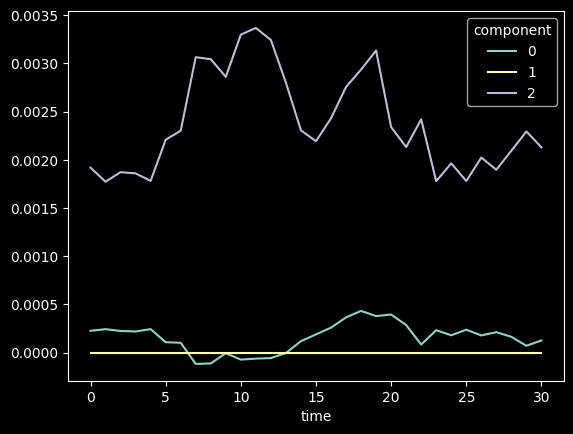

In [ ]:
from pca_analysis.parafac2_pipeline.estimators import PARAFAC2

parafac2 = PARAFAC2(rank=3, linesearch=False, nn_modes="all", n_iter_max=1)
parafac2.fit_transform(raw_data.to_numpy())

component_xr = parafac2.get_sample_component_tensors(
    as_xarr=True, input_coords=raw_data.coords
)
component_xr.sel(sample=10, mz=39).plot.line(x="time")


The ordering of the components is not repeatable, even if the solution is. For example in the above plot the noise (the lowest intensity signal) may be component 0, 1 or 2. We can demonstrate the random nature of component ordering through a series of correlation matrixes over a number of runs:

/var/folders/mh/cknmc22s2zv5m4l777wwz1b00000gn/T/ipykernel_75824/2009398968.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


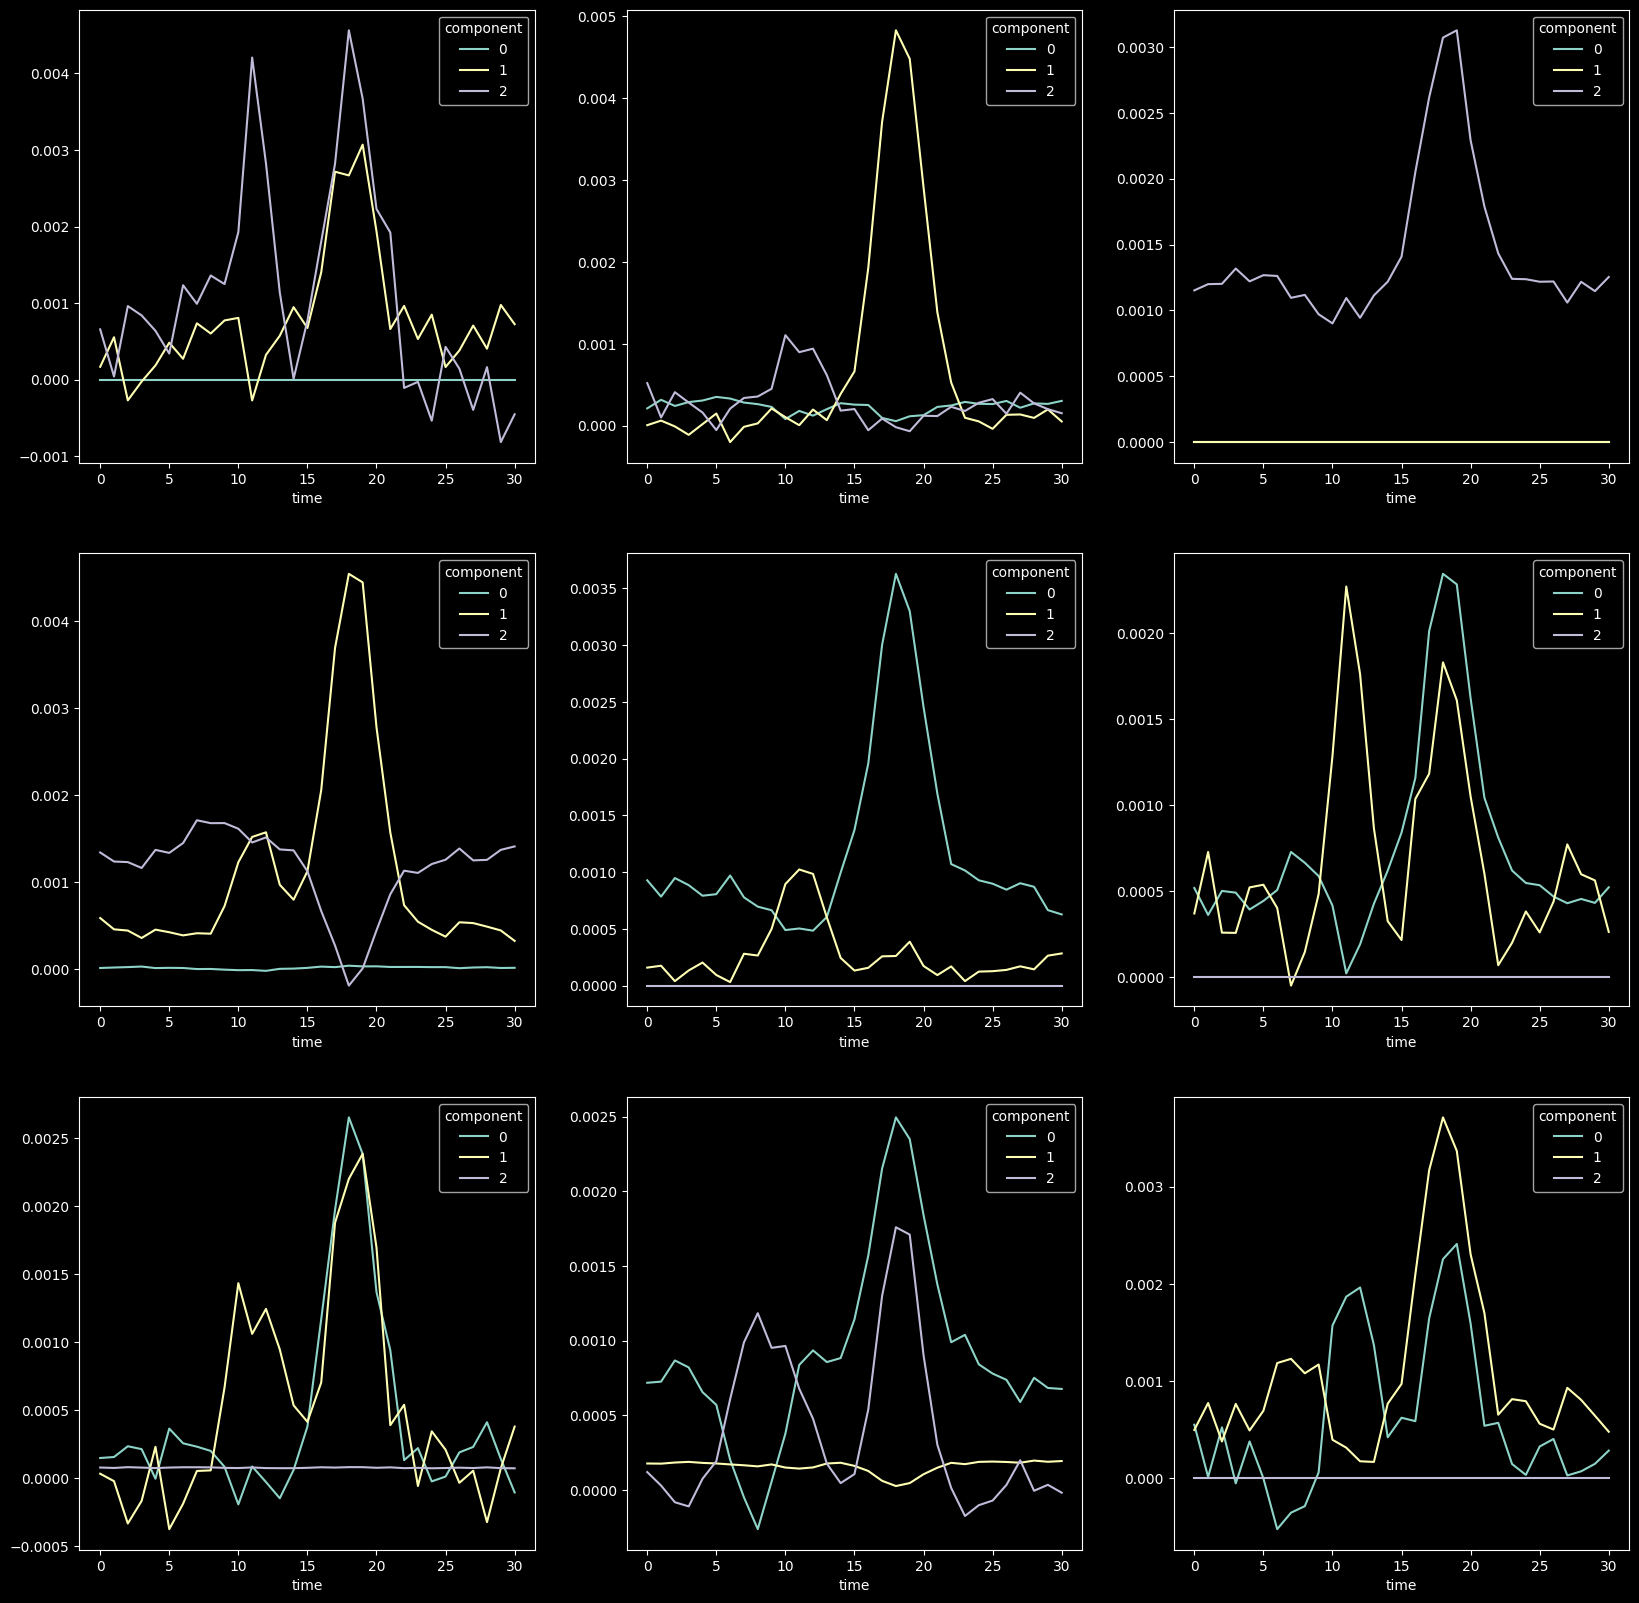

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pca_analysis.parafac2_pipeline.estimators import PARAFAC2

fig, axes = plt.subplots(
    3,
    3,
)

for ax in np.ravel(axes):
    parafac2 = PARAFAC2(rank=3, linesearch=False, nn_modes="all", n_iter_max=1)
    parafac2.fit_transform(raw_data.to_numpy())

    component_xr = parafac2.get_sample_component_tensors(
        as_xarr=True, input_coords=raw_data.coords
    )
    component_xr.sel(sample=10, mz=39).plot.line(x="time", ax=ax)
fig.set_figwidth(20)
fig.set_figheight(20)
fig.show()


And as we can see, the component (or rank) order assignment is random. We will need a deeper understanding of the model to understand why.